# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [2]:
df = pd.read_csv('RTA_Dataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [4]:
df.shape

(12316, 32)

In [5]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [6]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [7]:
df.sample(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
1045,13:55:00,Sunday,31-50,Male,NaN,NaN,NaN,NaN,NaN,NaN,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,No priority to vehicle,Slight Injury
9850,9:48:00,Friday,Under 18,Male,High school,Employee,1-2yr,Automobile,Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,"In carriageway, statioNot a Pedestrianry - not...",Changing lane to the left,Slight Injury
1182,16:56:00,Sunday,31-50,Male,Elementary school,Employee,5-10yr,Public (13?45 seats),Owner,NaN,...,Going straight,Driver or rider,Female,Under 18,2,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
5343,19:08:00,Monday,Unknown,Female,Elementary school,Employee,Above 10yr,Public (12 seats),Owner,Unknown,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving to the left,Slight Injury
11375,18:40:00,Thursday,18-30,Male,High school,Employee,2-5yr,NaN,Owner,1-2yr,...,Reversing,Driver or rider,Male,18-30,2,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
12007,11:50:00,Monday,18-30,Male,Elementary school,Employee,2-5yr,Automobile,Owner,2-5yrs,...,Moving Backward,Driver or rider,Male,Over 51,3,Driver,Normal,Not a Pedestrian,No distancing,Serious Injury
9488,19:55:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Bicycle,Owner,1-2yr,...,Other,Passenger,Female,Over 51,3,Driver,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
3452,19:45:00,Friday,31-50,Male,Elementary school,Employee,Above 10yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Driving to the left,Slight Injury
1832,10:35:00,Thursday,18-30,Male,Elementary school,Employee,5-10yr,Long lorry,Owner,Below 1yr,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
927,3:32:00,Saturday,Under 18,Male,NaN,Owner,NaN,Long lorry,Owner,Unknown,...,Going straight,Passenger,Male,18-30,3,Other,Normal,Not a Pedestrian,Changing lane to the right,Fatal injury


In [8]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [11]:
#Handling missing values

In [12]:
df['Educational_level'].unique()

array(['Above high school', 'Junior high school', nan,
       'Elementary school', 'High school', 'Unknown', 'Illiterate',
       'Writing & reading'], dtype=object)

In [13]:
df['Educational_level'].fillna('Unknown', inplace=True)

In [14]:
df = pd.get_dummies(df, columns=['Educational_level'])

In [15]:
df['Vehicle_driver_relation'].unique()

array(['Employee', 'Unknown', 'Owner', nan, 'Other'], dtype=object)

In [16]:
df['Vehicle_driver_relation'].fillna('Unknown', inplace=True)

In [17]:
df = pd.get_dummies(df, columns=['Vehicle_driver_relation'])

In [18]:
#Vehicle_driver_relation_enc = LabelEncoder()
#df['Vehicle_driver_relation'] = Vehicle_driver_relation_enc.fit_transform(df['Vehicle_driver_relation'])

In [19]:
df['Driving_experience'].unique()

array(['1-2yr', 'Above 10yr', '5-10yr', '2-5yr', nan, 'No Licence',
       'Below 1yr', 'unknown'], dtype=object)

In [20]:
df['Driving_experience'].fillna('unknown', inplace=True)

In [21]:
driving_Exp_mapper = {'1-2yr': 1.5, 'Above 10yr': 10, '5-10yr': 7.5, '2-5yr': 3.5, 'No Licence': 0, 'Below 1yr': 0.5, 'unknown': -1}
df['Driving_experience'] = df['Driving_experience'].map(driving_Exp_mapper)

In [22]:
df['Driving_experience'] = df['Driving_experience'].astype(int)

In [23]:
df['Driving_experience'].head()

,Driving_experience
0,1
1,10
2,1
3,7
4,3


In [24]:
df['Type_of_vehicle'].unique()

array(['Automobile', 'Public (> 45 seats)', 'Lorry (41?100Q)', nan,
       'Public (13?45 seats)', 'Lorry (11?40Q)', 'Long lorry',
       'Public (12 seats)', 'Taxi', 'Pick up upto 10Q', 'Stationwagen',
       'Ridden horse', 'Other', 'Bajaj', 'Turbo', 'Motorcycle',
       'Special vehicle', 'Bicycle'], dtype=object)

In [25]:
df['Type_of_vehicle'].fillna(df['Type_of_vehicle'].mode()[0], inplace=True)

In [26]:
df['Type_of_vehicle'] = df['Type_of_vehicle'].replace('Lorry (41?100Q)', 'Lorry (41-100Q)')
df['Type_of_vehicle'] = df['Type_of_vehicle'].replace('Public (13?45 seats)', 'Public (13-45 seats)')
df['Type_of_vehicle'] = df['Type_of_vehicle'].replace('Lorry (11?40Q)', 'Lorry (11-40Q)')

In [27]:
df['Type_of_vehicle'].unique()

array(['Automobile', 'Public (> 45 seats)', 'Lorry (41-100Q)',
       'Public (13-45 seats)', 'Lorry (11-40Q)', 'Long lorry',
       'Public (12 seats)', 'Taxi', 'Pick up upto 10Q', 'Stationwagen',
       'Ridden horse', 'Other', 'Bajaj', 'Turbo', 'Motorcycle',
       'Special vehicle', 'Bicycle'], dtype=object)

In [28]:
df['Owner_of_vehicle'].unique()

array(['Owner', 'Governmental', nan, 'Organization', 'Other'],
      dtype=object)

In [29]:
df['Owner_of_vehicle'].fillna(df['Owner_of_vehicle'].mode()[0], inplace=True)

In [30]:
df = pd.get_dummies(df, columns=['Owner_of_vehicle'])

In [31]:
#Owner_of_vehicle_enc = LabelEncoder()
#df['Owner_of_vehicle'] = Owner_of_vehicle_enc.fit_transform(df['Owner_of_vehicle'])

In [32]:
df['Service_year_of_vehicle'].unique()

array(['Above 10yr', '5-10yrs', nan, '1-2yr', '2-5yrs', 'Unknown',
       'Below 1yr'], dtype=object)

In [33]:
df['Service_year_of_vehicle'].fillna('Unknown', inplace=True)

In [34]:
service_year_mapper = {'1-2yr': 1.5, 'Above 10yr': 10, '5-10yrs': 7.5, '2-5yrs': 3.5, 'Below 1yr': 0.5, 'Unknown': -1}
df['Service_year_of_vehicle'] = df['Service_year_of_vehicle'].map(service_year_mapper)

In [35]:
df['Service_year_of_vehicle'] = df['Service_year_of_vehicle'].astype(int)

In [36]:
df['Service_year_of_vehicle'].head()

,Service_year_of_vehicle
0,10
1,7
2,-1
3,-1
4,7


In [37]:
df['Defect_of_vehicle'].unique()

array(['No defect', nan, '7', '5'], dtype=object)

In [38]:
df['Defect_of_vehicle'].fillna('-1', inplace=True)

In [39]:
df['Defect_of_vehicle'] = df['Defect_of_vehicle'].replace('No defect', '0')

In [40]:
df['Defect_of_vehicle'] = df['Defect_of_vehicle'].astype(int)

In [41]:
df['Area_accident_occured'].unique()

array(['Residential areas', 'Office areas', '  Recreational areas',
       ' Industrial areas', nan, 'Other', ' Church areas',
       '  Market areas', 'Unknown', 'Rural village areas',
       ' Outside rural areas', ' Hospital areas', 'School areas',
       'Rural village areasOffice areas', 'Recreational areas'],
      dtype=object)

In [42]:
df['Area_accident_occured'].fillna('Unknown', inplace=True)

In [43]:
df['Lanes_or_Medians'].unique()

array([nan, 'Undivided Two way', 'other', 'Double carriageway (median)',
       'One way', 'Two-way (divided with solid lines road marking)',
       'Two-way (divided with broken lines road marking)', 'Unknown'],
      dtype=object)

In [44]:
df['Lanes_or_Medians'].fillna('Unknown', inplace=True)

In [45]:
df['Road_allignment'].unique()

array(['Tangent road with flat terrain', nan,
       'Tangent road with mild grade and flat terrain', 'Escarpments',
       'Tangent road with rolling terrain', 'Gentle horizontal curve',
       'Tangent road with mountainous terrain and',
       'Steep grade downward with mountainous terrain',
       'Sharp reverse curve',
       'Steep grade upward with mountainous terrain'], dtype=object)

In [46]:
df['Road_allignment'].fillna(df['Road_allignment'].mode()[0], inplace=True)

In [47]:
df['Types_of_Junction'].unique()

array(['No junction', 'Y Shape', 'Crossing', 'O Shape', 'Other',
       'Unknown', 'T Shape', 'X Shape', nan], dtype=object)

In [48]:
df['Lanes_or_Medians'].fillna('Unknown', inplace=True)

In [49]:
df['Road_surface_type'].unique()

array(['Asphalt roads', 'Earth roads', nan,
       'Asphalt roads with some distress', 'Gravel roads', 'Other'],
      dtype=object)

In [50]:
df['Road_surface_type'].fillna(df['Road_surface_type'].mode()[0], inplace=True)

In [51]:
df['Type_of_collision'].unique()

array(['Collision with roadside-parked vehicles',
       'Vehicle with vehicle collision',
       'Collision with roadside objects', 'Collision with animals',
       'Other', 'Rollover', 'Fall from vehicles',
       'Collision with pedestrians', 'With Train', 'Unknown', nan],
      dtype=object)

In [52]:
df['Type_of_collision'].fillna('Unknown', inplace=True)

In [53]:
df['Vehicle_movement'].unique()

array(['Going straight', 'U-Turn', 'Moving Backward', 'Turnover',
       'Waiting to go', 'Getting off', 'Reversing', 'Unknown', 'Parked',
       'Stopping', 'Overtaking', 'Other', 'Entering a junction', nan],
      dtype=object)

In [54]:
df['Vehicle_movement'].fillna('Unknown', inplace=True)

In [55]:
df['Work_of_casuality'].unique()

array([nan, 'Driver', 'Other', 'Unemployed', 'Employee', 'Self-employed',
       'Student', 'Unknown'], dtype=object)

In [56]:
df['Work_of_casuality'].fillna('Unknown', inplace=True)

In [57]:
df = pd.get_dummies(df, columns=['Work_of_casuality'])

In [58]:
#Work_of_casuality_enc = LabelEncoder()
#df['Work_of_casuality'] = Work_of_casuality_enc.fit_transform(df['Work_of_casuality'])

In [59]:
df['Fitness_of_casuality'].unique()

array([nan, 'Normal', 'Deaf', 'Other', 'Blind', 'NormalNormal'],
      dtype=object)

In [60]:
df['Fitness_of_casuality'] = df['Fitness_of_casuality'].replace('NormalNormal', 'Normal')

In [61]:
df['Fitness_of_casuality'].fillna(df['Fitness_of_casuality'].mode()[0], inplace=True)

In [62]:
df = pd.get_dummies(df, columns=['Fitness_of_casuality'])

In [63]:
#Fix

<Axes: xlabel='Day_of_week'>

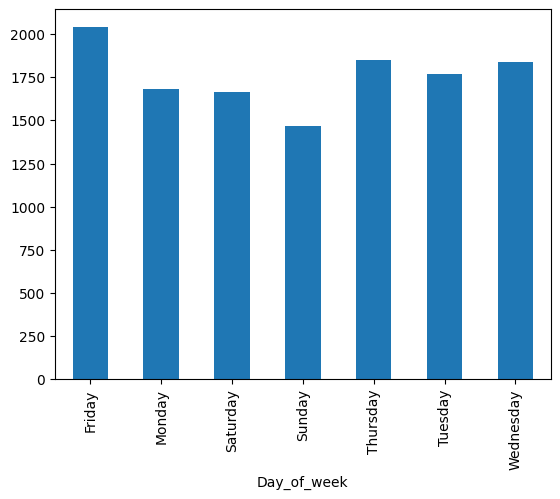

In [64]:
df['Day_of_week'].value_counts().sort_index().plot(kind='bar')

In [65]:
df['Age_band_of_driver'].unique()

array(['18-30', '31-50', 'Under 18', 'Over 51', 'Unknown'], dtype=object)

([<matplotlib.patches.Wedge at 0x7d08a0f07490>,
 [Text(0.5092641845009233, 0.9750128154976271, '18-30'),
  Text(-1.0964958595541783, -0.08773157915223044, '31-50'),
  Text(-0.048526358840080504, -1.0989291116799682, 'Over 51'),
  Text(0.7538523285207841, -0.8010659565752323, 'Unknown'),
  Text(1.0757323689809388, -0.2297822236959542, 'Under 18')])

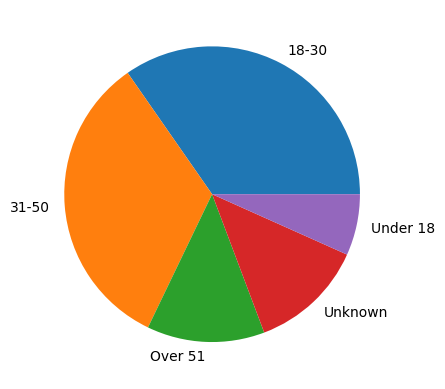

In [66]:
Age_band_of_driver_pie = df['Age_band_of_driver'].value_counts()
plt.pie(Age_band_of_driver_pie, labels=Age_band_of_driver_pie.index)

In [67]:
Age_band_of_driver_mapper = {'18-30': 24, '31-50': 40, 'Under 18': 18, 'Over 51': 51, 'Unknown': -1}
df['Age_band_of_driver'] = df['Age_band_of_driver'].map(Age_band_of_driver_mapper)

([<matplotlib.patches.Wedge at 0x7d08a0f3a800>,
 [Text(-1.072465263047081, 0.24457771680460846, 'Male'),
  Text(1.0602587952163456, -0.2930039029883113, 'Female'),
  Text(1.0988663171073576, -0.04992811960120703, 'Unknown')])

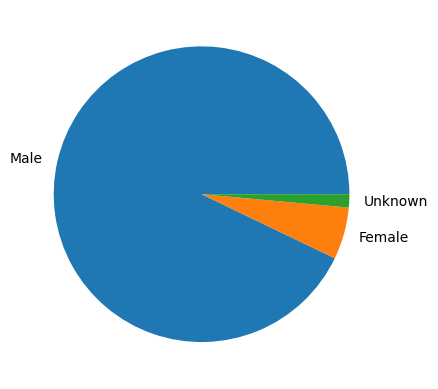

In [68]:
Sex_of_driver_pie = df['Sex_of_driver'].value_counts()
plt.pie(Sex_of_driver_pie, labels=Sex_of_driver_pie.index)

In [69]:
Sex_of_driver_enc = LabelEncoder()
df['Sex_of_driver'] = Sex_of_driver_enc.fit_transform(df['Sex_of_driver'])

In [70]:
df['Road_surface_conditions'].unique()

array(['Dry', 'Wet or damp', 'Snow', 'Flood over 3cm. deep'], dtype=object)

<Axes: xlabel='Road_surface_conditions'>

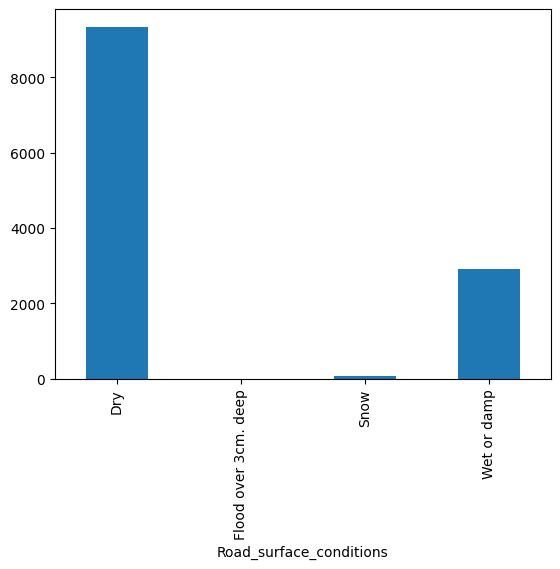

In [71]:
df['Road_surface_conditions'].value_counts().sort_index().plot(kind='bar')

([<matplotlib.patches.Wedge at 0x7d08a0e21960>,
 [Text(-0.7979826789604789, 0.757115343972804, 'Dry'),
  Text(0.7839437994685374, -0.771642481512542, 'Wet or damp'),
  Text(1.0998040392090642, -0.020762353899003817, 'Snow'),
  Text(1.0999998569064098, -0.0005610756438676646, 'Flood over 3cm. deep')])

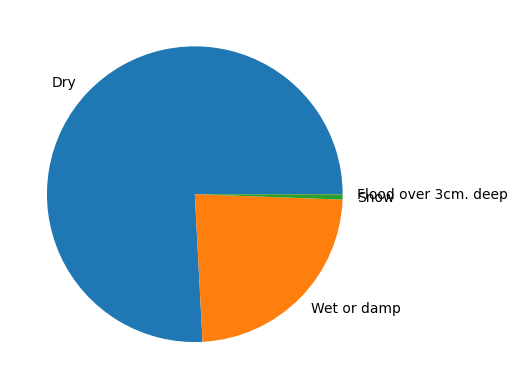

In [72]:
Road_surface_conditions_pie = df['Road_surface_conditions'].value_counts()
plt.pie(Road_surface_conditions_pie, labels=Road_surface_conditions_pie.index)

In [73]:
Road_surface_conditions_enc = LabelEncoder()
df['Road_surface_conditions'] = Road_surface_conditions_enc.fit_transform(df['Road_surface_conditions'])

In [74]:
df['Light_conditions'].unique()

array(['Daylight', 'Darkness - lights lit', 'Darkness - no lighting',
       'Darkness - lights unlit'], dtype=object)

([<matplotlib.patches.Wedge at 0x7d08a0e81210>,
 [Text(-0.6860267462403117, 0.8598647006610581, 'Daylight'),
  Text(0.633969455439531, -0.8989342187110827, 'Darkness - lights lit'),
  Text(1.0973534015049724, -0.07625950567284771, 'Darkness - no lighting'),
  Text(1.0999427403413138, -0.011223545359701168, 'Darkness - lights unlit')])

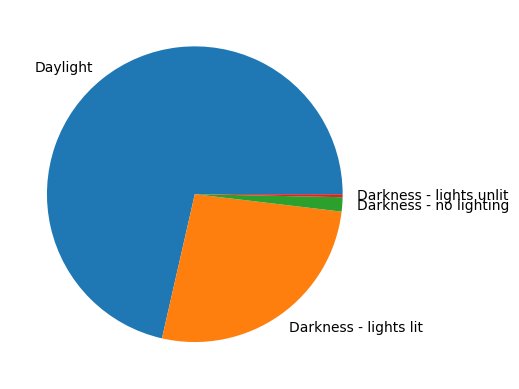

In [75]:
Light_conditions_pie = df['Light_conditions'].value_counts()
plt.pie(Light_conditions_pie, labels=Light_conditions_pie.index)

In [76]:
Light_conditions_enc = LabelEncoder()
df['Light_conditions'] = Light_conditions_enc.fit_transform(df['Light_conditions'])

In [77]:
df['Weather_conditions'].unique()

array(['Normal', 'Raining', 'Raining and Windy', 'Cloudy', 'Other',
       'Windy', 'Snow', 'Unknown', 'Fog or mist'], dtype=object)

<Axes: xlabel='Weather_conditions'>

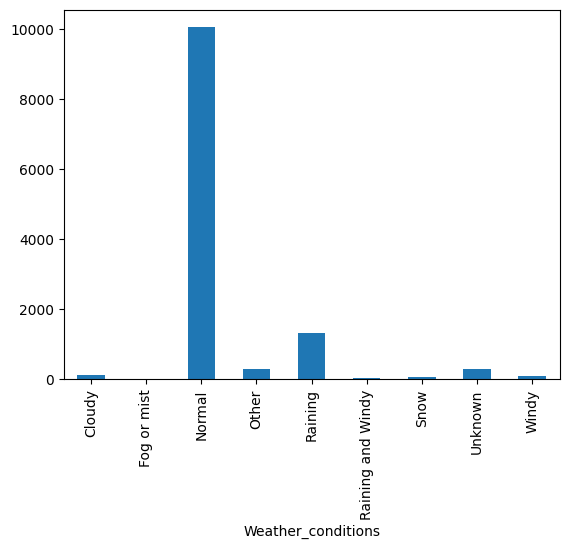

In [78]:
df['Weather_conditions'].value_counts().sort_index().plot(kind='bar')

([<matplotlib.patches.Wedge at 0x7d08a0d5f280>,
 [Text(-0.9232907640478596, 0.597941606700788, 'Normal'),
  Text(0.7585389416696624, -0.7966295713634215, 'Raining'),
  Text(1.0153523369607673, -0.4231543829718756, 'Other'),
  Text(1.0671833187352877, -0.26668289073942725, 'Unknown'),
  Text(1.0894651329816794, -0.15187403997132584, 'Cloudy'),
  Text(1.0963374531489145, -0.08968940195447692, 'Windy'),
  Text(1.0990724946885395, -0.04516250014237844, 'Snow'),
  Text(1.09987116787934, -0.016834906228935274, 'Raining and Windy'),
  Text(1.0999964209712991, -0.0028060381915768675, 'Fog or mist')])

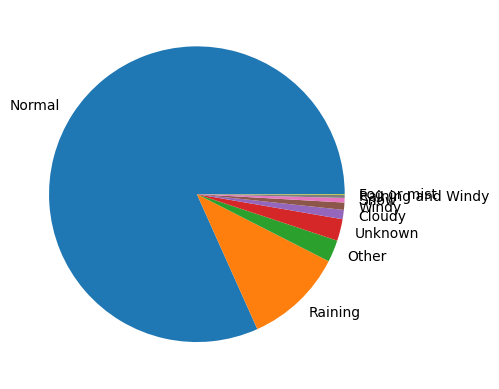

In [79]:
Weather_conditions_pie = df['Weather_conditions'].value_counts()
plt.pie(Weather_conditions_pie, labels=Weather_conditions_pie.index)

In [80]:
Weather_conditions_enc = LabelEncoder()
df['Weather_conditions'] = Weather_conditions_enc.fit_transform(df['Weather_conditions'])

([<matplotlib.patches.Wedge at 0x7d08a0bf0670>,
 [Text(-0.5811227651295108, 0.933968057188377, '2'),
  Text(0.056654075930073246, -1.0985400837841601, '1'),
  Text(0.9015140161686532, -0.6302955486527456, '3'),
  Text(1.0924032959402963, -0.12905440332967172, '4'),
  Text(1.0998877727047842, -0.015712652688492968, '6'),
  Text(1.0999982462278948, -0.0019642544529446335, '7')])

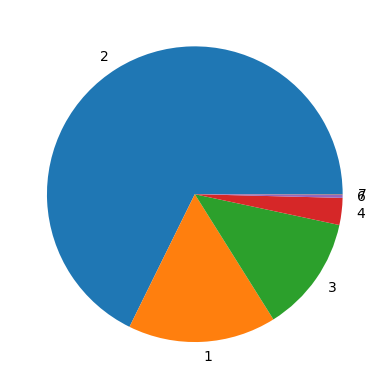

In [81]:
Number_of_vehicles_involved_pie = df['Number_of_vehicles_involved'].value_counts()
plt.pie(Number_of_vehicles_involved_pie, labels=Number_of_vehicles_involved_pie.index)

([<matplotlib.patches.Wedge at 0x7d08a0c504f0>,
 [Text(-0.5946404531850621, 0.9254202998831742, '1'),
  Text(0.1704701584666027, -1.0867105985828847, '2'),
  Text(0.9083730109076569, -0.6203696261540842, '3'),
  Text(1.0610767499423905, -0.29002781027290064, '4'),
  Text(1.0929208953942318, -0.12459500957370176, '5'),
  Text(1.0992055837725696, -0.041798141145328024, '6'),
  Text(1.0999483220107444, -0.01066249997645408, '7'),
  Text(1.0999977091750417, -0.002244952039762188, '8')])

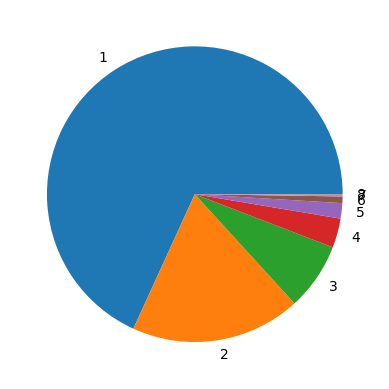

In [82]:
Number_of_casualties_pie = df['Number_of_casualties'].value_counts()
plt.pie(Number_of_casualties_pie, labels=Number_of_casualties_pie.index)

In [83]:
df['Casualty_class'].unique()

array(['na', 'Driver or rider', 'Pedestrian', 'Passenger'], dtype=object)

([<matplotlib.patches.Wedge at 0x7d08a0aad1e0>,
 [Text(0.3352186209134225, 1.0476776585347725, 'Driver or rider'),
  Text(-0.9578683484232936, -0.5408218071498524, 'na'),
  Text(0.5246198295381107, -0.9668371292288086, 'Pedestrian'),
  Text(1.0418859164583174, -0.3528083574489307, 'Passenger')])

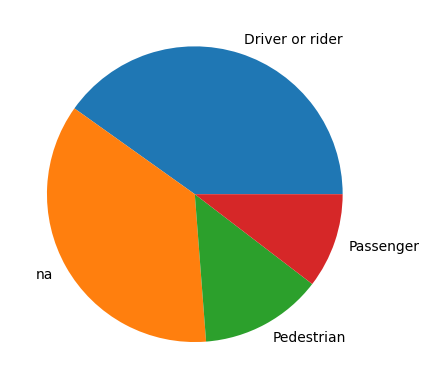

In [84]:
Casualty_class_pie = df['Casualty_class'].value_counts()
plt.pie(Casualty_class_pie, labels=Casualty_class_pie.index)

In [85]:
Casualty_class_enc = LabelEncoder()
df['Casualty_class'] = Casualty_class_enc.fit_transform(df['Casualty_class'])

([<matplotlib.patches.Wedge at 0x7d08a0b10220>,
 [Text(0.25168493059987573, 1.0708196373381167, 'Male'),
  Text(-0.8610882043028047, -0.6844903976028965, 'na'),
  Text(0.8633533812393457, -0.6816310872477789, 'Female')])

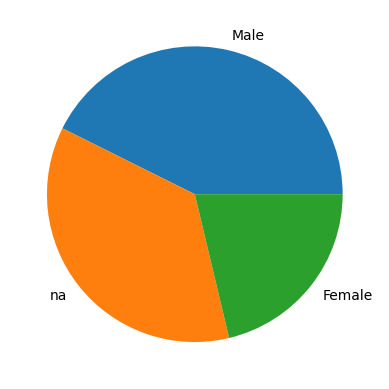

In [86]:
Sex_of_casualty_pie = df['Sex_of_casualty'].value_counts()
plt.pie(Sex_of_casualty_pie, labels=Sex_of_casualty_pie.index)

In [87]:
Sex_of_casualty_enc = LabelEncoder()
df['Sex_of_casualty'] = Sex_of_casualty_enc.fit_transform(df['Sex_of_casualty'])

In [88]:
df['Age_band_of_casualty'].unique()

array(['na', '31-50', '18-30', 'Under 18', 'Over 51', '5'], dtype=object)

In [89]:
Age_band_of_casualty_mapper = {'18-30': 24, '31-50': 40, 'Under 18': 18, 'Over 51': 51, 'na': -1, '5': 18}
df['Age_band_of_casualty'] = df['Age_band_of_casualty'].map(Age_band_of_casualty_mapper)

([<matplotlib.patches.Wedge at 0x7d08a0b3f6a0>,
 [Text(0.46600997192232485, 0.9964109122590711, '-1'),
  Text(-1.0970945009855888, 0.07989778411934768, '24'),
  Text(-0.23471898744636918, -1.074665993196096, '40'),
  Text(0.7396370045367566, -0.8142094948598265, '18'),
  Text(1.064830375623707, -0.2759280180573825, '51')])

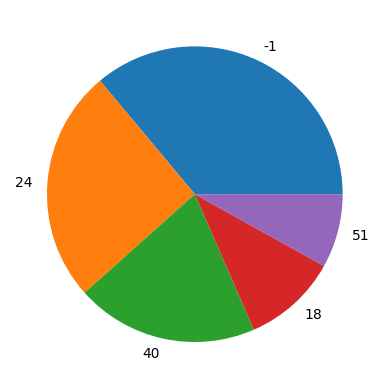

In [90]:
Age_band_of_casualty_pie = df['Age_band_of_casualty'].value_counts()
plt.pie(Age_band_of_casualty_pie, labels=Age_band_of_casualty_pie.index)

In [91]:
df['Casualty_severity'].unique()

array(['na', '3', '2', '1'], dtype=object)

In [92]:
df['Casualty_severity'] = df['Casualty_severity'].replace('na', -1)

In [93]:
df['Casualty_severity'] = df['Casualty_severity'].astype(int)

([<matplotlib.patches.Wedge at 0x7d08a099b2e0>,
 [Text(-0.2552343556410826, 1.0699791697507395, '3'),
  Text(0.033945900148732285, -1.0994760915377344, '-1'),
  Text(1.0758494199256177, -0.22923356134238296, '2'),
  Text(1.0999758074115173, -0.0072954170121052285, '1')])

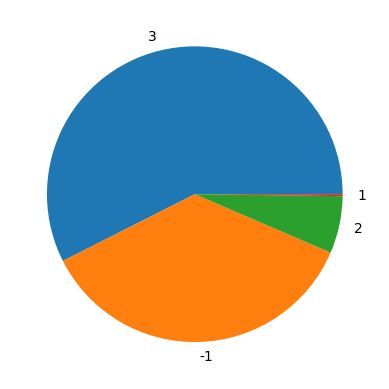

In [94]:
Casualty_severity_pie = df['Casualty_severity'].value_counts()
plt.pie(Casualty_severity_pie, labels=Casualty_severity_pie.index)

In [95]:
df['Pedestrian_movement'].unique()

array(['Not a Pedestrian', "Crossing from driver's nearside",
       'Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle',
       'Unknown or other',
       'Crossing from offside - masked by  parked or statioNot a Pedestrianry vehicle',
       'In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing)',
       'Walking along in carriageway, back to traffic',
       'Walking along in carriageway, facing traffic',
       'In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing) - masked by parked or statioNot a Pedestrianry vehicle'],
      dtype=object)

In [96]:
df['Cause_of_accident'].unique()

array(['Moving Backward', 'Overtaking', 'Changing lane to the left',
       'Changing lane to the right', 'Overloading', 'Other',
       'No priority to vehicle', 'No priority to pedestrian',
       'No distancing', 'Getting off the vehicle improperly',
       'Improper parking', 'Overspeed', 'Driving carelessly',
       'Driving at high speed', 'Driving to the left', 'Unknown',
       'Overturning', 'Turnover', 'Driving under the influence of drugs',
       'Drunk driving'], dtype=object)

<Axes: xlabel='Cause_of_accident'>

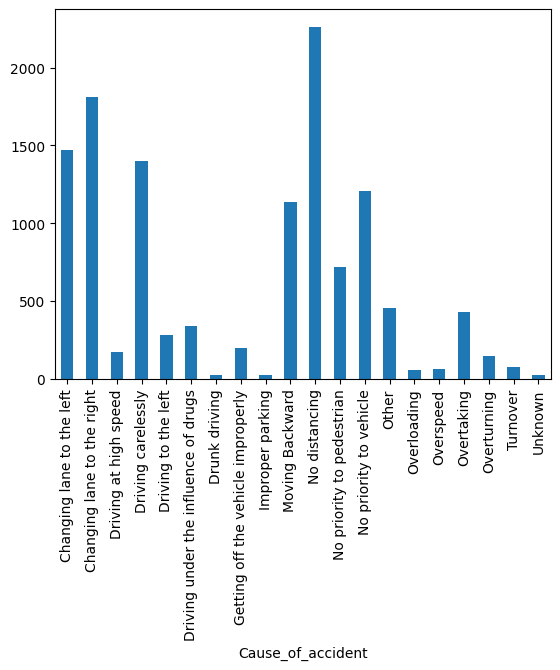

In [97]:
df['Cause_of_accident'].value_counts().sort_index().plot(kind='bar')

In [98]:
Cause_of_accident_enc = LabelEncoder()
df['Cause_of_accident'] = Cause_of_accident_enc.fit_transform(df['Cause_of_accident'])

([<matplotlib.patches.Wedge at 0x7d08a08e8c40>,
 [Text(-0.9731879149499573, 0.5127429006776738, 'Slight Injury'),
  Text(0.9517381514628155, -0.5515382951800747, 'Serious Injury'),
  Text(1.0991067385120272, -0.044321296883715444, 'Fatal injury')])

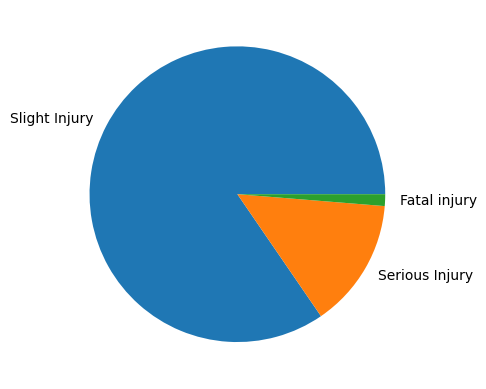

In [99]:
Accident_severity_pie = df['Accident_severity'].value_counts()
plt.pie(Accident_severity_pie, labels=Accident_severity_pie.index)

In [100]:
Accident_severity_enc = LabelEncoder()
df['Accident_severity'] = Accident_severity_enc.fit_transform(df['Accident_severity'])

In [101]:
df['Types_of_Junction'].unique()

array(['No junction', 'Y Shape', 'Crossing', 'O Shape', 'Other',
       'Unknown', 'T Shape', 'X Shape', nan], dtype=object)

In [102]:
df['Types_of_Junction'].fillna('Unknown', inplace=True)

In [103]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Driving_experience,0
Type_of_vehicle,0
Service_year_of_vehicle,0
Defect_of_vehicle,0
Area_accident_occured,0
Lanes_or_Medians,0


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 53 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Time                                  12316 non-null  object
 1   Day_of_week                           12316 non-null  object
 2   Age_band_of_driver                    12316 non-null  int64 
 3   Sex_of_driver                         12316 non-null  int64 
 4   Driving_experience                    12316 non-null  int64 
 5   Type_of_vehicle                       12316 non-null  object
 6   Service_year_of_vehicle               12316 non-null  int64 
 7   Defect_of_vehicle                     12316 non-null  int64 
 8   Area_accident_occured                 12316 non-null  object
 9   Lanes_or_Medians                      12316 non-null  object
 10  Road_allignment                       12316 non-null  object
 11  Types_of_Junction           

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

<Axes: >

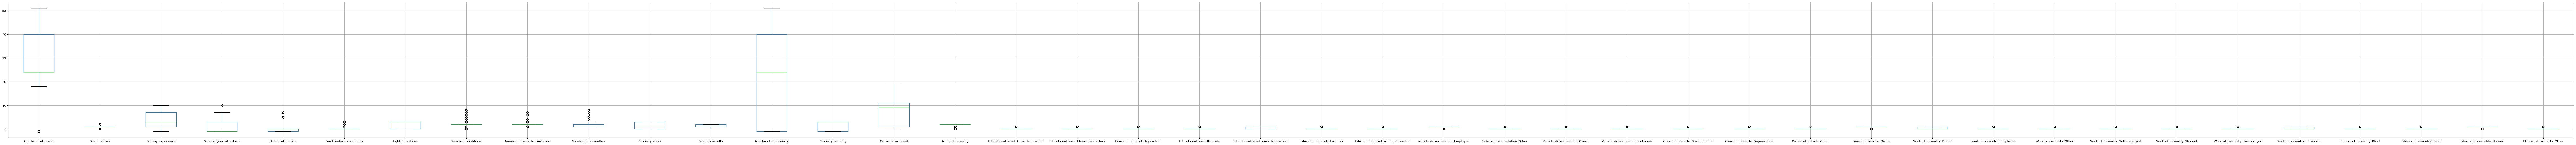

In [105]:
plt.figure(figsize=(150, 8))
df.boxplot()

In [106]:
def remove_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1-1.5*IQR
  upper_bound = Q3+1.5*IQR
  return df[(df[column]>=lower_bound) & (df[column]<=upper_bound)]

#no outliers all of these are because of the encoding

array([[<Axes: title={'center': 'Age_band_of_driver'}>,
        <Axes: title={'center': 'Sex_of_driver'}>,
        <Axes: title={'center': 'Driving_experience'}>,
        <Axes: title={'center': 'Service_year_of_vehicle'}>],
       [<Axes: title={'center': 'Defect_of_vehicle'}>,
        <Axes: title={'center': 'Road_surface_conditions'}>,
        <Axes: title={'center': 'Light_conditions'}>,
        <Axes: title={'center': 'Weather_conditions'}>],
       [<Axes: title={'center': 'Number_of_vehicles_involved'}>,
        <Axes: title={'center': 'Number_of_casualties'}>,
        <Axes: title={'center': 'Casualty_class'}>,
        <Axes: title={'center': 'Sex_of_casualty'}>],
       [<Axes: title={'center': 'Age_band_of_casualty'}>,
        <Axes: title={'center': 'Casualty_severity'}>,
        <Axes: title={'center': 'Cause_of_accident'}>,
        <Axes: title={'center': 'Accident_severity'}>]], dtype=object)

<Figure size 5000x5000 with 0 Axes>

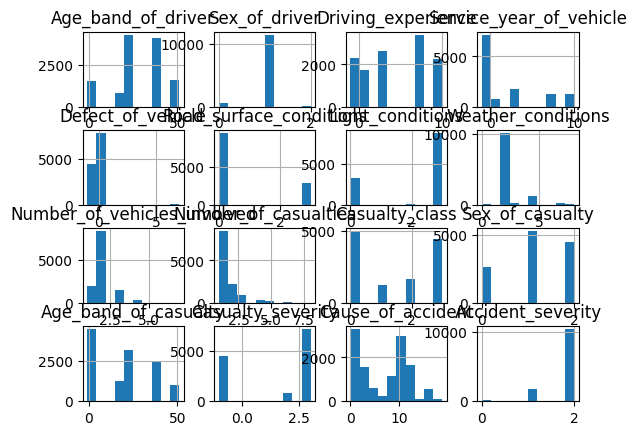

In [107]:
plt.figure(figsize=(50, 50))
df.hist()

In [108]:
#sns.pairplot(df)

<Axes: xlabel='Accident_severity', ylabel='Age_band_of_driver'>

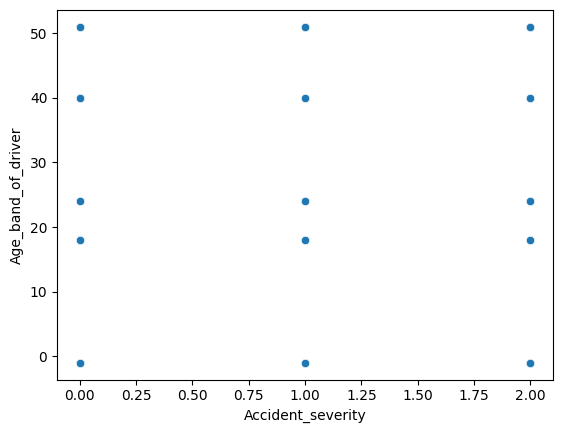

In [109]:
sns.scatterplot(data=df, x='Accident_severity', y='Age_band_of_driver')

<Axes: xlabel='Accident_severity', ylabel='Cause_of_accident'>

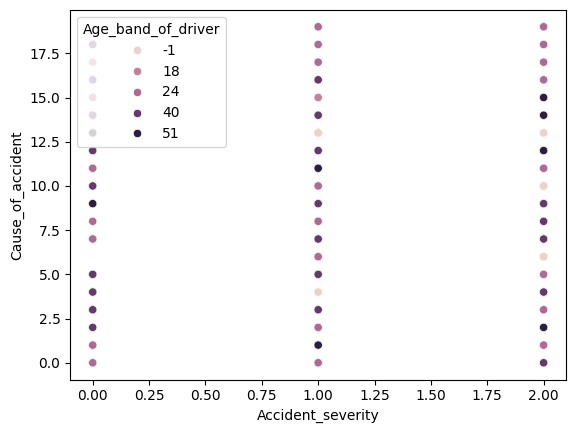

In [110]:
sns.scatterplot(data=df, x='Accident_severity', y='Cause_of_accident', hue='Age_band_of_driver')

<Axes: >

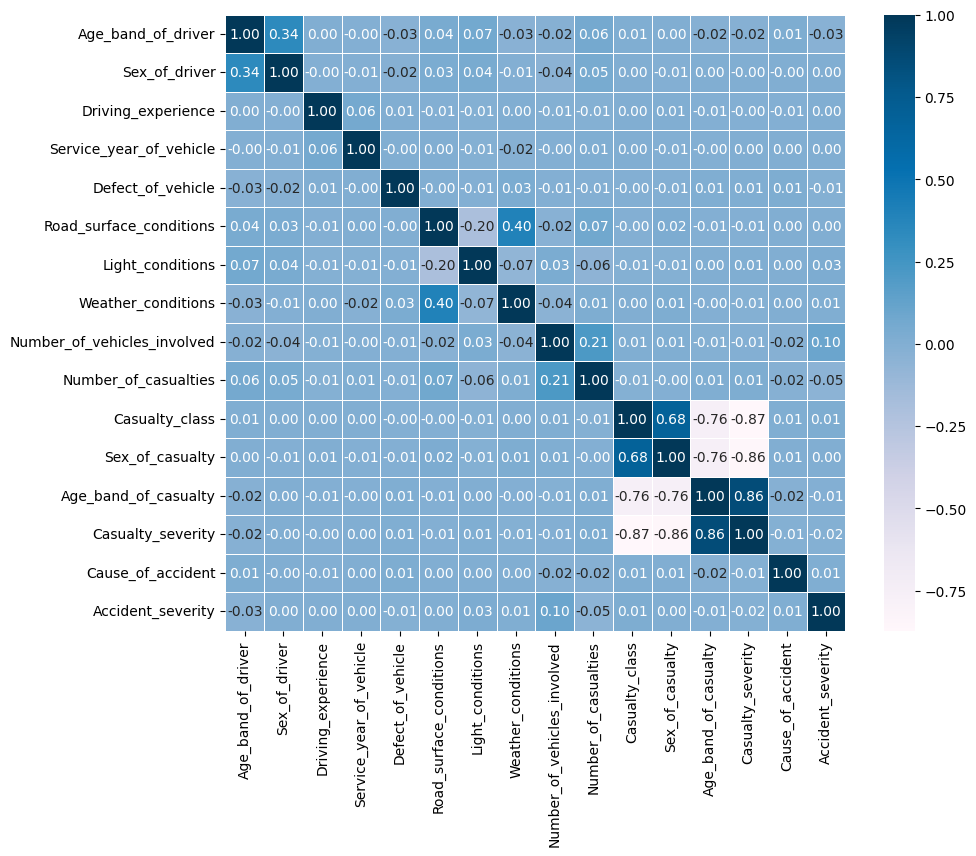

In [111]:
df_corr_col = df.select_dtypes(include='int').columns.tolist()
df_corr = df[df_corr_col]
corr_matrix = df_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='PuBu', linewidths=0.5)

In [113]:
label_enc = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
  df[col] = label_enc.fit_transform(df[col])

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 53 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Time                                  12316 non-null  int64
 1   Day_of_week                           12316 non-null  int64
 2   Age_band_of_driver                    12316 non-null  int64
 3   Sex_of_driver                         12316 non-null  int64
 4   Driving_experience                    12316 non-null  int64
 5   Type_of_vehicle                       12316 non-null  int64
 6   Service_year_of_vehicle               12316 non-null  int64
 7   Defect_of_vehicle                     12316 non-null  int64
 8   Area_accident_occured                 12316 non-null  int64
 9   Lanes_or_Medians                      12316 non-null  int64
 10  Road_allignment                       12316 non-null  int64
 11  Types_of_Junction                     123

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [130]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, auc, classification_report

In [116]:
X=df.drop(columns=['Accident_severity'])
y=df['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

feature_sel = SelectFromModel(LR_model, prefit=True, threshold='mean')

X_train_sel = feature_sel.transform(X_train)
X_test_sel = feature_sel.transform(X_test)

feature_names = X.columns[feature_sel.get_support()]
print(feature_names)

Index(['Day_of_week', 'Driving_experience', 'Type_of_vehicle',
       'Service_year_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Pedestrian_movement', 'Cause_of_accident'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [118]:
LR_model = LogisticRegression()
LR_model.fit(X_train_sel, y_train)
y_pred_LR = LR_model.predict(X_test_sel)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Decision Tree Classifier

In [119]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train_sel, y_train)
y_pred_DT = DT_model.predict(X_test_sel)

#### Support Vector Machine (SVM)

In [120]:
SVM_model = SVC()
SVM_model.fit(X_train_sel, y_train)
y_pred_SVM = SVM_model.predict(X_test_sel)

#### K-Neighbors Classifier

In [121]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train_sel, y_train)
y_pred_KNN = KNN_model.predict(X_test_sel)

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [133]:
print('Decision Tree Evaluation: ')
conf_mat_DT = classification_report(y_test, y_pred_DT)
print(conf_mat_DT)
print('------------------------------')

print('LR Evaluation: ')
conf_mat_LR = classification_report(y_test, y_pred_LR)
print(conf_mat_LR)
print('------------------------------')

print('SVM Evaluation: ')
conf_mat_SVM = classification_report(y_test, y_pred_SVM)
print(conf_mat_SVM)
print('------------------------------')

print('KNN Evaluation: ')
conf_mat_KNN = classification_report(y_test, y_pred_KNN)
print(conf_mat_KNN)
print('------------------------------')

Decision Tree Evaluation: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.19      0.20      0.19       463
           2       0.84      0.83      0.84      2570

    accuracy                           0.72      3079
   macro avg       0.34      0.34      0.34      3079
weighted avg       0.73      0.72      0.73      3079

------------------------------
LR Evaluation: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.00      0.00      0.00       463
           2       0.83      1.00      0.91      2570

    accuracy                           0.83      3079
   macro avg       0.28      0.33      0.30      3079
weighted avg       0.70      0.83      0.76      3079

------------------------------
SVM Evaluation: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [131]:

print('LR Evaluation: ')
conf_mat_LR = classification_report(y_test, y_pred_LR)
acc_LR = accuracy_score(y_test, y_pred_LR)
#pre_LR = precision_score(y_test, y_pred_LR)
#recall_LR = recall_score(y_test, y_pred_LR)
#f1_LR = f1_score(y_test, y_pred_LR)
print("Accuracy LR: ", acc_LR)
#print("Precision LR: ", pre_LR)
#print("Recall LR: ", recall_LR)
#print("F1 score LR: ", f1_LR)
print(conf_mat_LR)

LR Evaluation: 
Accuracy LR:  0.834686586554076
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.00      0.00      0.00       463
           2       0.83      1.00      0.91      2570

    accuracy                           0.83      3079
   macro avg       0.28      0.33      0.30      3079
weighted avg       0.70      0.83      0.76      3079



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

the dataset features are all objects except two features which are integers, it has a large amount of missing values but no duplicates. from what i see in the statistical analysis there are outliers in both features(Number_of_vehicles_involved, Number_of_casualties) since the mean is not reasonable compared to the max. Moreover, from what i see in the head and tail and samples that their are numerical features  that have unnecessary string letters, that need to be handled. In the data preprocessing part I will check and handle the missing values according to their type and values. I will try and handle the incorrect data entries. nothing needs scaling so i didn't perfore any. did some visualisation to understand the relationships and the features. i made a linear regression model to evaluate the features and choose from them, then with the selected features i trained the other models. also i didn't do any new features since we already have a lot on hand. i choose the svm model since it has 83 accuracy with 91 f1 score not like the LR model.

